In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import scipy.optimize
from pandas import *
from jupyterthemes import jtplot
import numba as nb
import matplotlib.pyplot as plt
import matplotlib as mtp

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy import signal
#%matplotlib notebook
plt.rcParams["font.size"]="16"
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.width'] = 2
# plt.rcParams['figure.figsize'] = [10, 10]

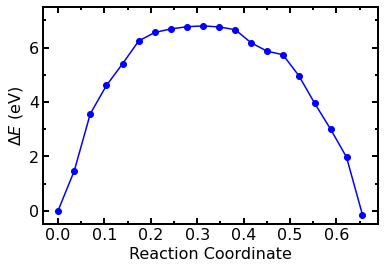

In [2]:
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(2.))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
################################################
pe = np.loadtxt('comp_2%_pe_neb.txt')
pe = pe - pe[2]
ax.plot(pe[2:22,0],pe[2:22,1], 'bo-')
plt.ylim(-.5,7.5)
plt.ylabel('$\Delta E$ (eV)')
plt.xlabel('Reaction Coordinate')
plt.savefig('comp_2%_neb.png', bbox_inches='tight', dpi=600)

In [3]:
pe_3 = np.loadtxt('comp_3%_pe_neb.txt')
pe_4 = np.loadtxt('comp_4%_pe_neb.txt')
pe_5 = np.loadtxt('comp_5%_pe_neb.txt')

In [4]:
e = [2,3,4,5]
Eb = [max(pe[:,1]), max(pe_3[:,1]), max(pe_4[:,1]), max(pe_5[:,1])] #
T_nuc = [650, 350, 150, 150]
T_error = [50, 50, 50, 50]
nu_neb = 1./5e-9/np.exp(-np.asarray(Eb)/8.617e-5/np.asarray(T_nuc))

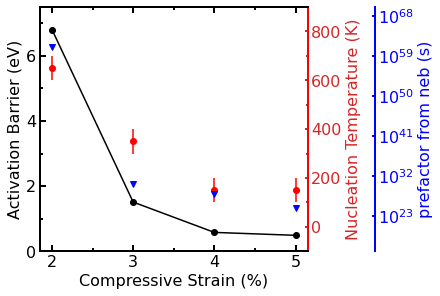

In [5]:
fig, ax1 = plt.subplots(constrained_layout=True)
ax1.xaxis.set_major_locator(MultipleLocator(1.))
ax1.xaxis.set_minor_locator(AutoMinorLocator(2))
ax1.yaxis.set_major_locator(MultipleLocator(2.))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
plt.tick_params(direction = 'in', length = 6, top = True, right = True, which = 'major')
plt.tick_params(direction = 'in', length = 3, top = True, right = True, which = 'minor')
ax1.plot(e, Eb, 'ko-')
ax1.set_ylim(0, 7.5)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.errorbar(e, T_nuc, T_error, fmt='ro', ecolor='red',) #, T_error, fmt='')
ax2.yaxis.set_major_locator(MultipleLocator(200.))
ax2.yaxis.set_minor_locator(AutoMinorLocator(2))
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', direction = 'in', color=color, labelcolor=color, which= 'major')
ax2.tick_params(axis='y', direction = 'in', color=color, labelcolor=color, which= 'minor')
ax2.set_ylim(-100,900)

ax1.set_xlabel('Compressive Strain (%)')
ax1.set_ylabel('Activation Barrier (eV)')
ax2.set_ylabel('Nucleation Temperature (K)', color=color)

ax3 = ax1.twinx()
ax3.semilogy(e, nu_neb, 'bv')
ax3.spines['right'].set_position(("axes", 1.25))
ax3.set_ylabel('prefactor from neb (s)', color='blue')
ax3.spines['right'].set_color('blue')
ax3.tick_params(axis='y', direction='in', color='blue', labelcolor='blue', which='major')
ax3.tick_params(axis='y', direction = 'in', labelcolor='blue', which= 'minor')
y_minor = mtp.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax3.yaxis.set_minor_locator(y_minor)
ax3.set_ylim(1e15,1e70)


plt.savefig('activation_barrier_vs_strain.png', bbox_inches='tight', dpi=600)

In [6]:
nu_neb

array([1.06390393e+61, 1.10895503e+30, 6.15072032e+27, 5.82025646e+24])

In [8]:
Eb

[6.800000000046566, 1.5100000000093132, 0.5800000000745058, 0.4900000001071021]